# Basics of image classification with Keras
Source: https://towardsdatascience.com/basics-of-image-classification-with-keras-43779a299c8b

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.preprocessing import image

C:\Users\rbehdad\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', test_x.shape)
print('test_y:', test_y.shape)
train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)
model = Sequential()
model.add(Dense(units=128, activation="relu", input_shape=(784,)))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(optimizer=SGD(0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_x, train_y, batch_size=32,epochs=10,  verbose=1)
file = "mnist-model.h5"
model.save(file)
print('model trained and saved at', file)
accuracy = model.evaluate(x=test_x, y=test_y, batch_size=32)
print("Accuracy: ", accuracy[1])

(train_x: (60000, 28, 28)
train_y: (60000,)
test_x: (10000, 28, 28)
test_y: (10000,)
Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 3.9212 - acc: 0.7378
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 1.0934 - acc: 0.9183
Epoch 3/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.7599 - acc: 0.9398
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.5844 - acc: 0.9500
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.4425 - acc: 0.9586
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.3434 - acc: 0.9648
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2538 - acc: 0.9705
Epoch 8/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2044 - acc: 0.9746
Epoch 9/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1625 - acc: 0.9785
Epoch 10/

In [3]:
model.load_weights("mnist-model.h5")
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

10000/10000 [==============================] - 0s 42us/step
Accuracy:  0.961


In [4]:
img = test_x[130]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ", classname)

Class:  6


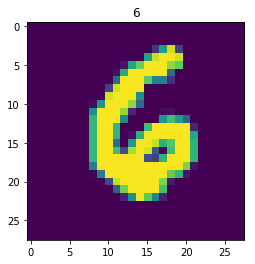

In [5]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

Class:  3


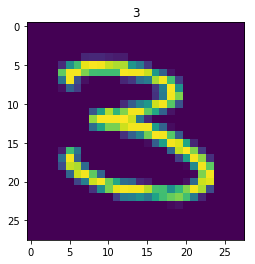

In [6]:
image_path = "testimage.png" # source: https://cdn-images-1.medium.com/max/1000/1*0D7K4JZNABjK2RMQyM5zVQ.png
img = image.load_img(path = image_path, color_mode = "grayscale", target_size = (28, 28, 1))
img = image.img_to_array(img)
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ", classname)
img = img.reshape((28, 28))
plt.imshow(img)
plt.title(classname)
plt.show()